House Price Prediction System


##### **Approach Plan**

- Understanding Problem Case (Domain Knowledge)

- Data Review

- Data Preprocessing

  1. Data Cleaning - incorrect/inconsistent/missing values, outliers and duplicates
  2. Data Integration - combine data from multiple sources into a dataset
  3. Data Transformation - convert to suitable format for analysis (normalization, standardization, discrezation)
  4. Data Reduction - drop, feature selection, feature extraction
  5. Data Discrezation - divide conti data into discrete categories/intervals (binning, clustering) when it is noisy

- Model Implementation

  1. Linear Regression
  2. Ridge
  3. Lasso

### Understanding Problem Case (Domain Knowledge)

When it comes to predicting the value of a house, some of the factors that must be taken into account are:
1. The Neighborhood (Distance of public facilities, crime rate, public transport, etc)
2. Age & Conidition of the house (outdated, renovation, etc)
3. Property Size

Reference : https://www.experian.com/blogs/ask-experian/factors-that-affect-home-value/

### Import libraries and dataset

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn import metrics
from IPython.display import clear_output

In [4]:
# Load dataset, for simplicity I just git clone from a repo that has the data
!git clone https://github.com/jerrychens/king_county_house_price.git
clear_output()
warnings.filterwarnings('ignore')

In [5]:
!pip install --upgrade scikit-learn
clear_output()

In [6]:
import pandas as pd
%cd /content/king_county_house_price
df = pd.read_csv('kc_house_data.csv')
clear_output()

### Data Review

In [7]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


House price (target) it consists of an ID, date, and 18 house features.

1. `Id`:  Unique ID for each home sold
2. `Date`: Date of the home sale
3. `Price`: Price of each home sold (target)
4. `Bedrooms`: Number of bedrooms
5. `Bathrooms`: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. `Sqft_living`: Square footage of the apartments interior living space
7. `Sqft_lot`: Square footage of the land space
8. `Floors`: Number of floors
9. `Waterfront`: A dummy variable for whether the apartment was overlooking the waterfront or not
10.`View`: An index from 0 to 4 of how good the view of the property was
11.`Condition`: An index from 1 to 5 on the condition of the apartment,
12. `Grade`: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
13. `Sqft_above`: The square footage of the interior housing space that is above ground level
14. `Sqft_basement`: The square footage of the interior housing space that is below ground level
15. `Yr_built`: The year the house was initially built
16. `Yr_renovated`: The year of the house’s last renovation
17. `Zipcode`: What zipcode area the house is in
18. `Lat`: Lattitude
19. `Long`: Longitude
20. `Sqft_living15`: The square footage of interior housing living space for the nearest 15 neighbors
21. `Sqft_lot15`: The square footage of the land lots of the nearest 15 neighbors

In [8]:
df.shape

(21613, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

###Data Cleaning

Missing values

In [10]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Outliers

In [11]:
df_price = df['price']

In [12]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

find_outliers_IQR(df_price)

5        1225000.0
21       2000000.0
49       1350000.0
69       1325000.0
125      1450000.0
           ...    
21568    1700000.0
21576    3567000.0
21590    1222500.0
21597    1575000.0
21600    1537000.0
Name: price, Length: 1146, dtype: float64

[]

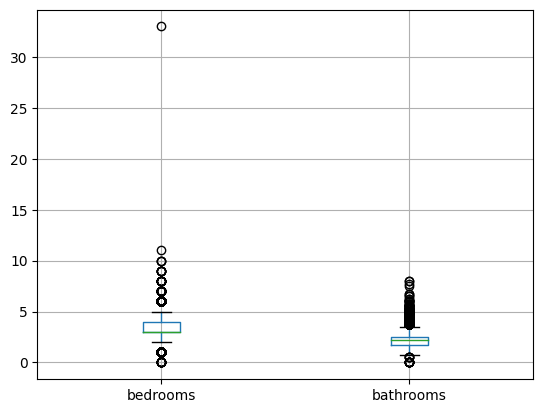

In [13]:
# Multiple boxplots
b_plot = df.boxplot(column = ['bedrooms', 'bathrooms'])
b_plot.plot()

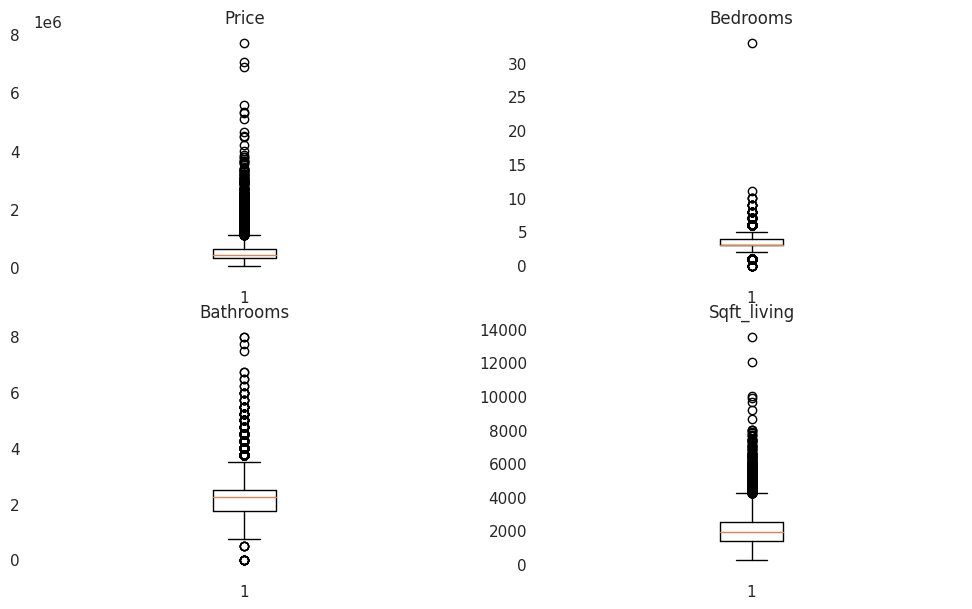

In [60]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(7, 3)

axis[0, 0, 0].boxplot(df['price'])
axis[0, 0, 0].set_title("Price")

axis[0, 1, 0].boxplot(df['bedrooms'])
axis[0, 1, 0].set_title("Bedrooms")

axis[0, 0, 1].boxplot(df['bathrooms'])
axis[0, 0, 1].set_title("Bathrooms")

axis[1, 0, 0].boxplot(df['sqft_living'])
axis[1, 0, 0].set_title("Sqft_living")

axis[1, 1, 0].boxplot(df['sqft_lot'])
axis[1, 1, 0].set_title("Sqft_lot")

axis[1, 0, 1].boxplot(df['floors'])
axis[1, 0, 1].set_title("Floors")

axis[1, 1, 1].boxplot(df['waterfront'])
axis[1, 1, 1].set_title("Waterfront")

axis[2, 0, 0].boxplot(df['view'])
axis[1, 1].set_title("View")

axis[2, ].boxplot(df['condition'])
axis[1, 1].set_title("Condition")

axis[1, 1].boxplot(df['grade'])
axis[1, 1].set_title("Grade")

axis[1, 1].boxplot(df['sqft_above'])
axis[1, 1].set_title("Sqft_above")

axis[1, 1].boxplot(df['sqft_basement'])
axis[1, 1].set_title("Sqft_basement")

axis[1, 1].boxplot(df['yr_built'])
axis[1, 1].set_title("Yr_built")

axis[1, 1].boxplot(df['yr_renovated'])
axis[1, 1].set_title("Yr_renovated")

axis[1, 1].boxplot(df['zipcode'])
axis[1, 1].set_title("Zipcode")

axis[1, 1].boxplot(df['lat'])
axis[1, 1].set_title("Latitude")

axis[1, 1].boxplot(df['long'])
axis[1, 1].set_title("Longitude")

axis[1, 1].boxplot(df['sqft_living15'])
axis[1, 1].set_title("Sqft_living15")

axis[1, 1].boxplot(df['lsqft_lot15'])
axis[1, 1].set_title("Sqft_lot15")


# Combine all the operations and display
plt.show()

[Text(0.5, 1.0, 'Price')]

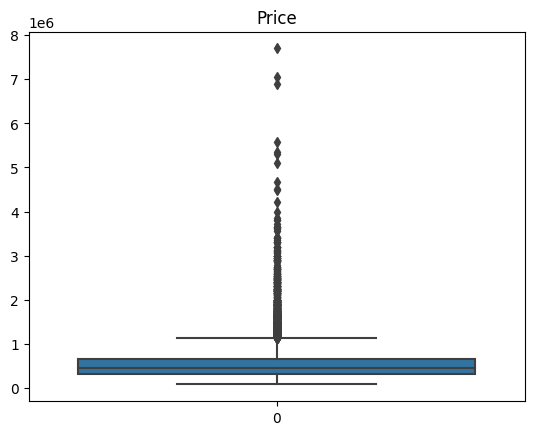

In [15]:
sns.boxplot(df['price']).set(title='Price')

[Text(0.5, 1.0, 'bedrooms')]

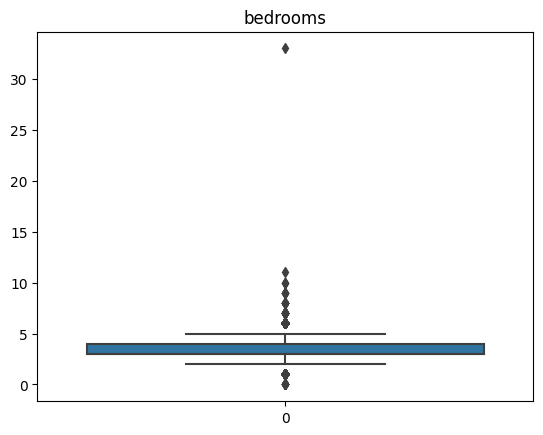

In [16]:
sns.boxplot(df['bedrooms']).set(title='bedrooms')

Data has no null, duplicate or inconsistent values.

Should check outliers?

In those cases where you shouldn’t drop the outlier, what do you do?
One option is to try a transformation.  **Square root and log transformations** both pull in high numbers.  This can make assumptions work better if the outlier is a dependent variable and can reduce the impact of a single point if the outlier is an independent variable.
____________________________________

Find correlation/colinearity of all sqft variables??

`sqft_basement` have many zeros meaning that there are many houses wihtout basement

The `zipcode` has 70 values. We can do data transofrmation (?) which is zipcodes by area
- Seattle : 98101-98112, 98115-98199
- Tacoma : 98402-98409, 98416-98465
- Kent : 98030-98032, 98304, 98042, 98064, 98089
- South Hill : 98373, 98374, 98375
- Renton : 98055-98059
- Bellevue : 98004-98009, 98015
- Redmond : 98052, 98073
- Everett : 98201, 98203-98204, 98206-98208, 98213, 98272, 98275, 98290

The `grade` has value from 1-13. Where it can be catogarized as
- Short (1-3)
- Medium (4-6)
- Average (7)
- Abov. Average (8-10)
- High (11-13)

`Age` also has many values thus binning is applicable

###Exploratory Data Analysis (EDA)

In [17]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [18]:
print('Bedrooms:', df['bedrooms'].unique())
#print('Bathrooms:', df['bathrooms'].unique())
print('Floors:', df['floors'].unique())
print('Waterfront:', df['waterfront'].unique())
print('View:', df['view'].unique())
print('Condition:', df['condition'].unique())
print('Grade:', df['grade'].unique())

Bedrooms: [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
Floors: [1.  2.  1.5 3.  2.5 3.5]
Waterfront: [0 1]
View: [0 3 4 2 1]
Condition: [3 5 4 1 2]
Grade: [ 7  6  8 11  9  5 10 12  4  3 13  1]


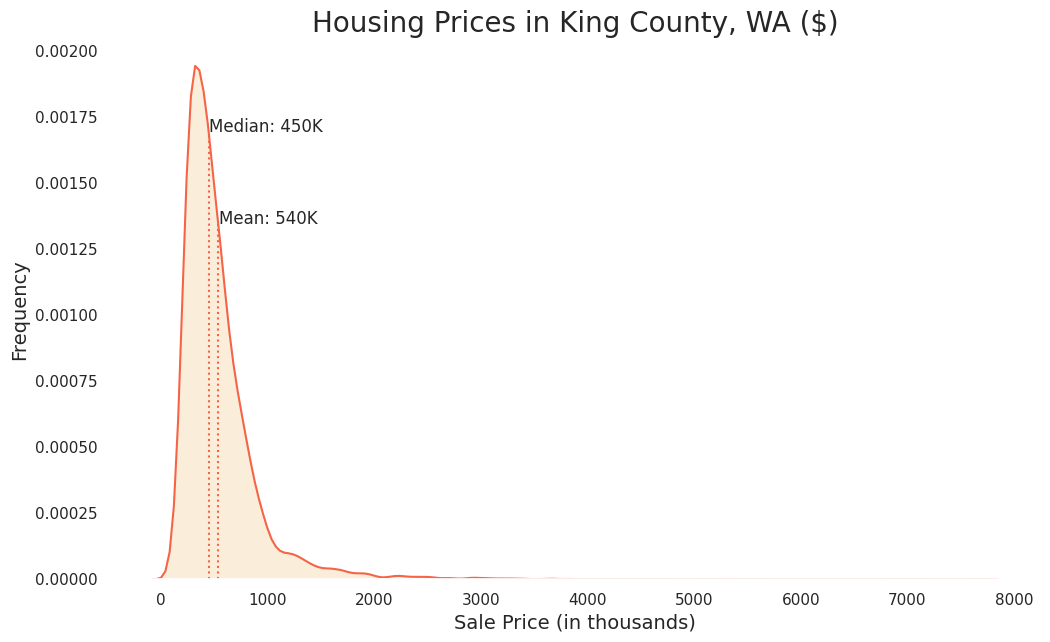

In [19]:
sns.set(rc={'figure.figsize':(12,7),
            'figure.facecolor':'white',
            'axes.facecolor':'white'})
fill = '#E8AB4E'
line_col = '#F56447'

x = df['price']/1000
p = sns.kdeplot(x, shade=False, color=line_col, legend=False)

kdeline = p.lines[0]
mean = x.mean()
q2 = np.quantile(x, 0.5)

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)

p.vlines(mean, 0, height, color=line_col, ls=':')
p.vlines(q2, 0, np.interp(q2, xs, ys), color=line_col, ls=':')
p.fill_between(xs, 0, ys, facecolor=fill, alpha=0.2)
p.text(mean+5, height, "Mean: " + str(int(mean)) + "K")
p.text(q2+5, np.interp(q2, xs, ys)+0.00000001, "Median: " + str(int(q2)) + "K")

p.set_xlabel("Sale Price (in thousands)", fontsize = 14)
p.set_ylabel("Frequency", fontsize = 14)
p.set_title("Housing Prices in King County, WA ($)", fontsize = 20);

#plt.savefig("images/SalesDistPlot.png", dpi=300)

In [20]:
# find the quick summary of the data
df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


The price has a really high standard deviation meaning its value ranges widely. Since it has a wide range of value, we can't take mean because the outliers affects the mean. Thus we will take the median instead. This is to see what kind of most people buy (Since it is also a normally distributed so the median is where the highest amount of houses is/ frequency)

Attributes Analysis
- `Id` can be dropped.
- `Date` can be used to calculate the house age (`date` - `yr_built` [note that we must first extract the year from the date] ), but can be dropped after that.
- `Bedrooms` ranges from 0-33,
- `Bathrooms` has wider range (30),
- `Floors` ranges from 1-3.5
- `Waterfront` is categorical (0 and 1)
- `View` ranges from 0-4
- `Condition` ranges from 1-5
- `Grade` : 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design


- `sqft_living`
- `sqft_lot`
- `sqft_above`
-` sqft_basement`
- `yr_built`
- `yr_renovated` can be used to calculate last reno (`date`-`yr_reno`)
- `zipcode`
- `lat`
- `long`
- `sqft_living15`
- `sqft_lot15`

Correlation Analysis

<Axes: >

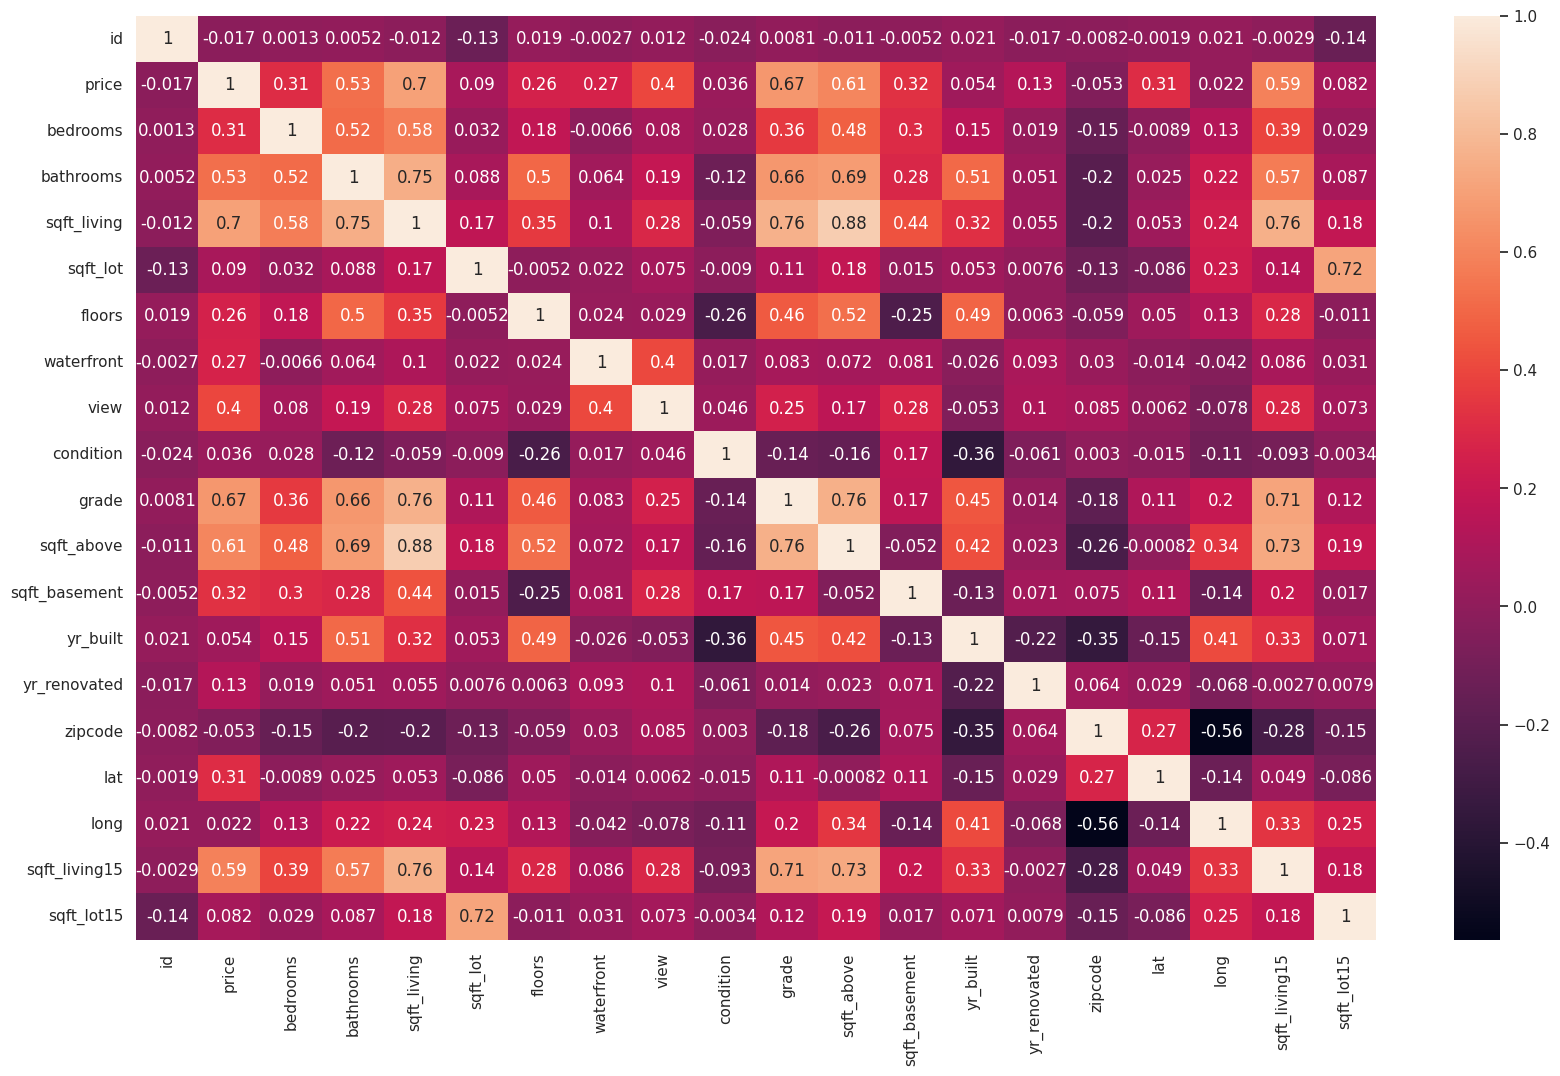

In [21]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

In [22]:
# Top attributes with high corr (thres=0.5)
threshold=0.5
a=abs(df.corr()['price'])
result=a[a>0.5]
result
warnings.filterwarnings('ignore')

Feature selection can be done in multiple ways but there are broadly 3 categories of it:
1. Filter Method - correlation/colinearity
2. Wrapper Method - use model performance, iterative
3. Embedded Method

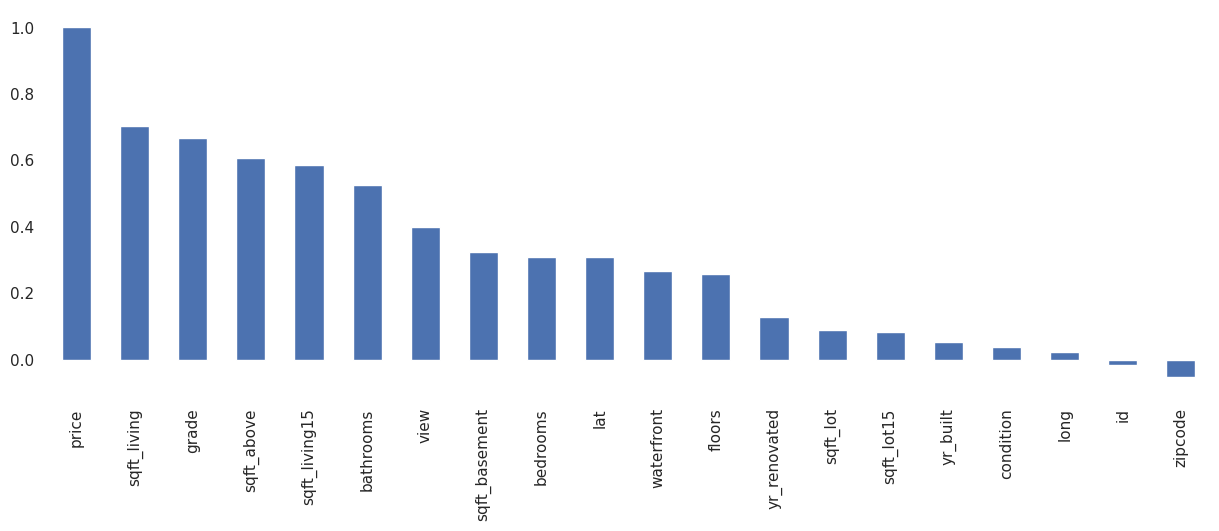

In [23]:
house_corr = df.corr()
house_corr['price'].sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()
warnings.filterwarnings('ignore')

We can see the correlation of all attributes to the price of the house.

Some of the low ones are: yr_renovated, sqft_lot, sqft_lot15, yr_built, condition, long, Id, Zipcode

Clearly yr_renovated, yr_built and condition should have better correlation thus we need to do feature engineering to fix this problem

In [24]:
# we want to preprcess the data and extract the year of the date attribute
df['year_sold'] = pd.to_datetime(df['date']).dt.date.astype('datetime64[ns]')
df['year_sold'] = pd.DatetimeIndex(df['year_sold']).year # extract only year

In [25]:
# Add new attribute (age of the house)
df['age'] = (df['year_sold'] - df['yr_built']).astype(int)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [26]:
# Add new attribute (last reno)
df['last_reno'] = np.where(df['yr_renovated'] != 0, (df['year_sold'] - df['yr_renovated']).astype(int), df['age'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age,last_reno
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,28


In [27]:
# Drop unnecessary attributes (id, date, yr_renovated, yr_built)
df.drop(['id', 'date', 'yr_renovated', 'yr_built'], axis = 1, inplace = True)

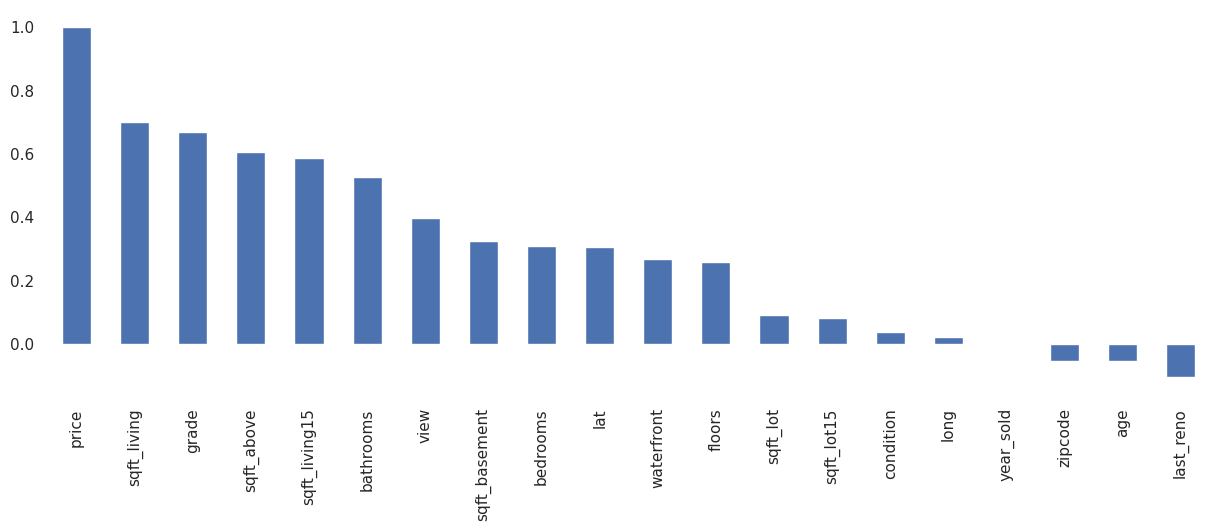

In [28]:
house_corr = df.corr()
house_corr['price'].sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

Note: A large negative correlation is just as useful as a large positive correlation. The only difference is that for a positive correlation, as the feature increases, the target will increase. For a negative correlation, as the feature decreases, the target will increase.
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

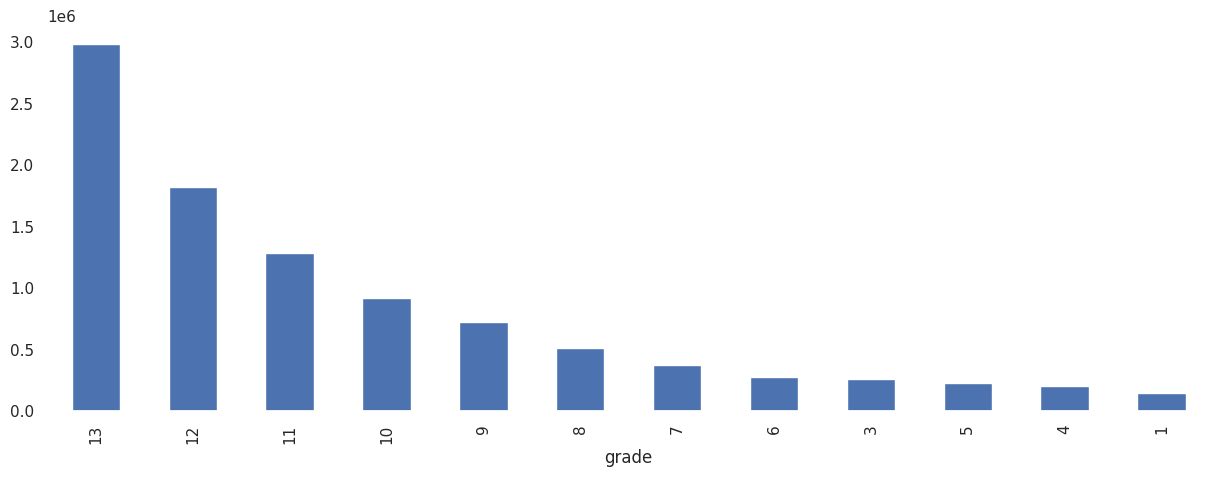

In [29]:
price_grade_med = df.groupby("grade")['price'].median()
price_grade_med.sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

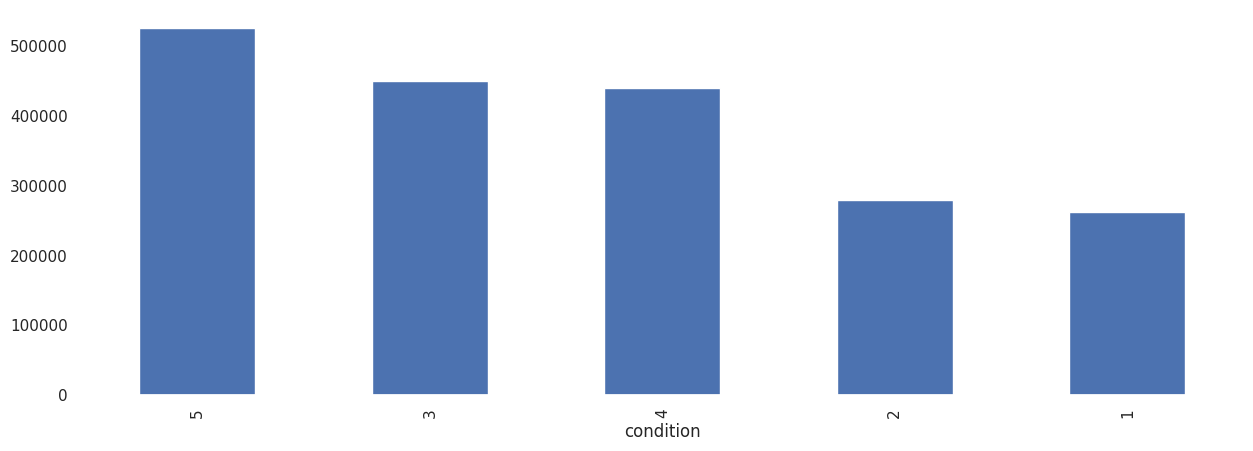

In [30]:
price_cond_med = df.groupby("condition")['price'].median()
price_cond_med.sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

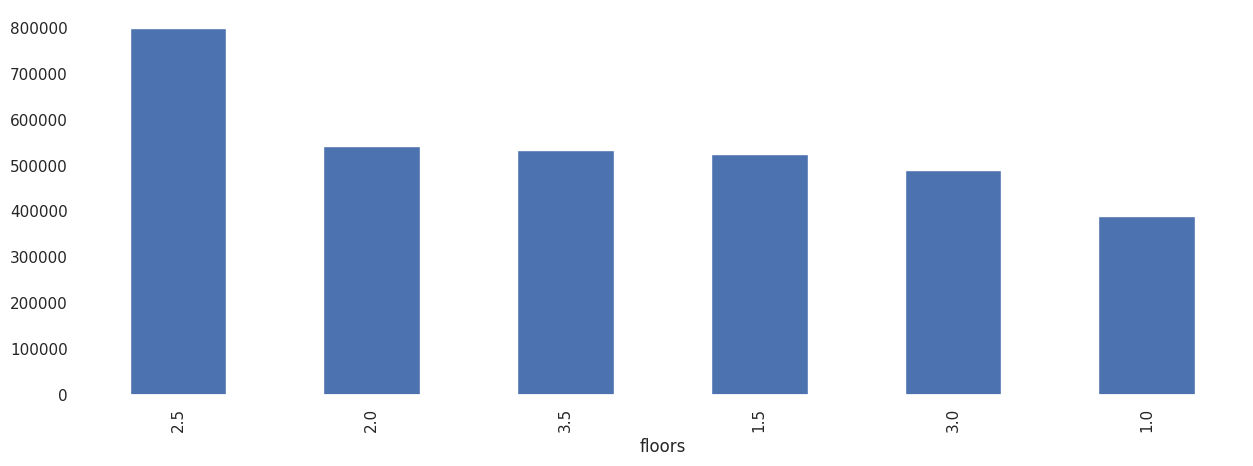

In [31]:
price_floor_med = df.groupby("floors")['price'].median()
price_floor_med.sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

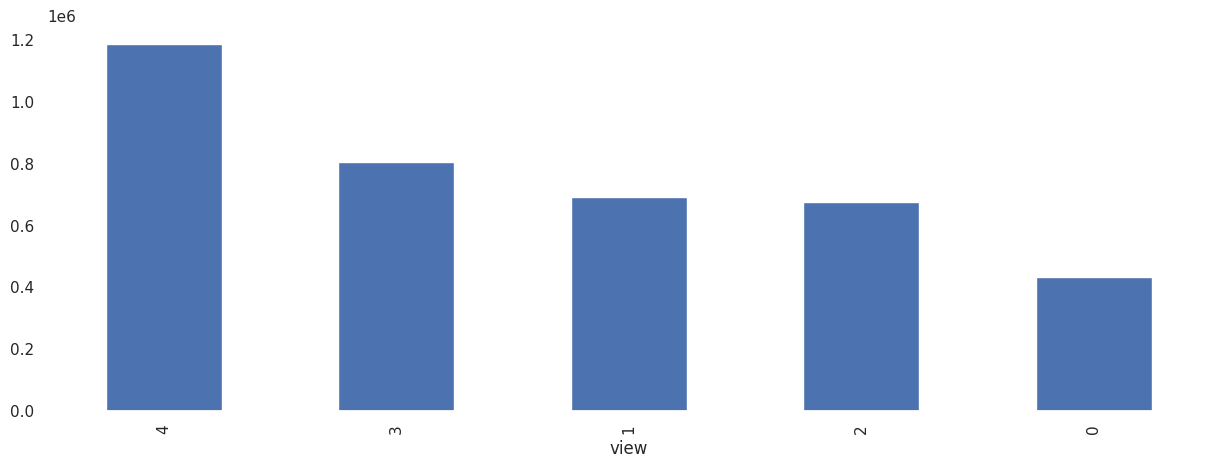

In [32]:
price_view_med = df.groupby("view")['price'].median()
price_view_med.sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

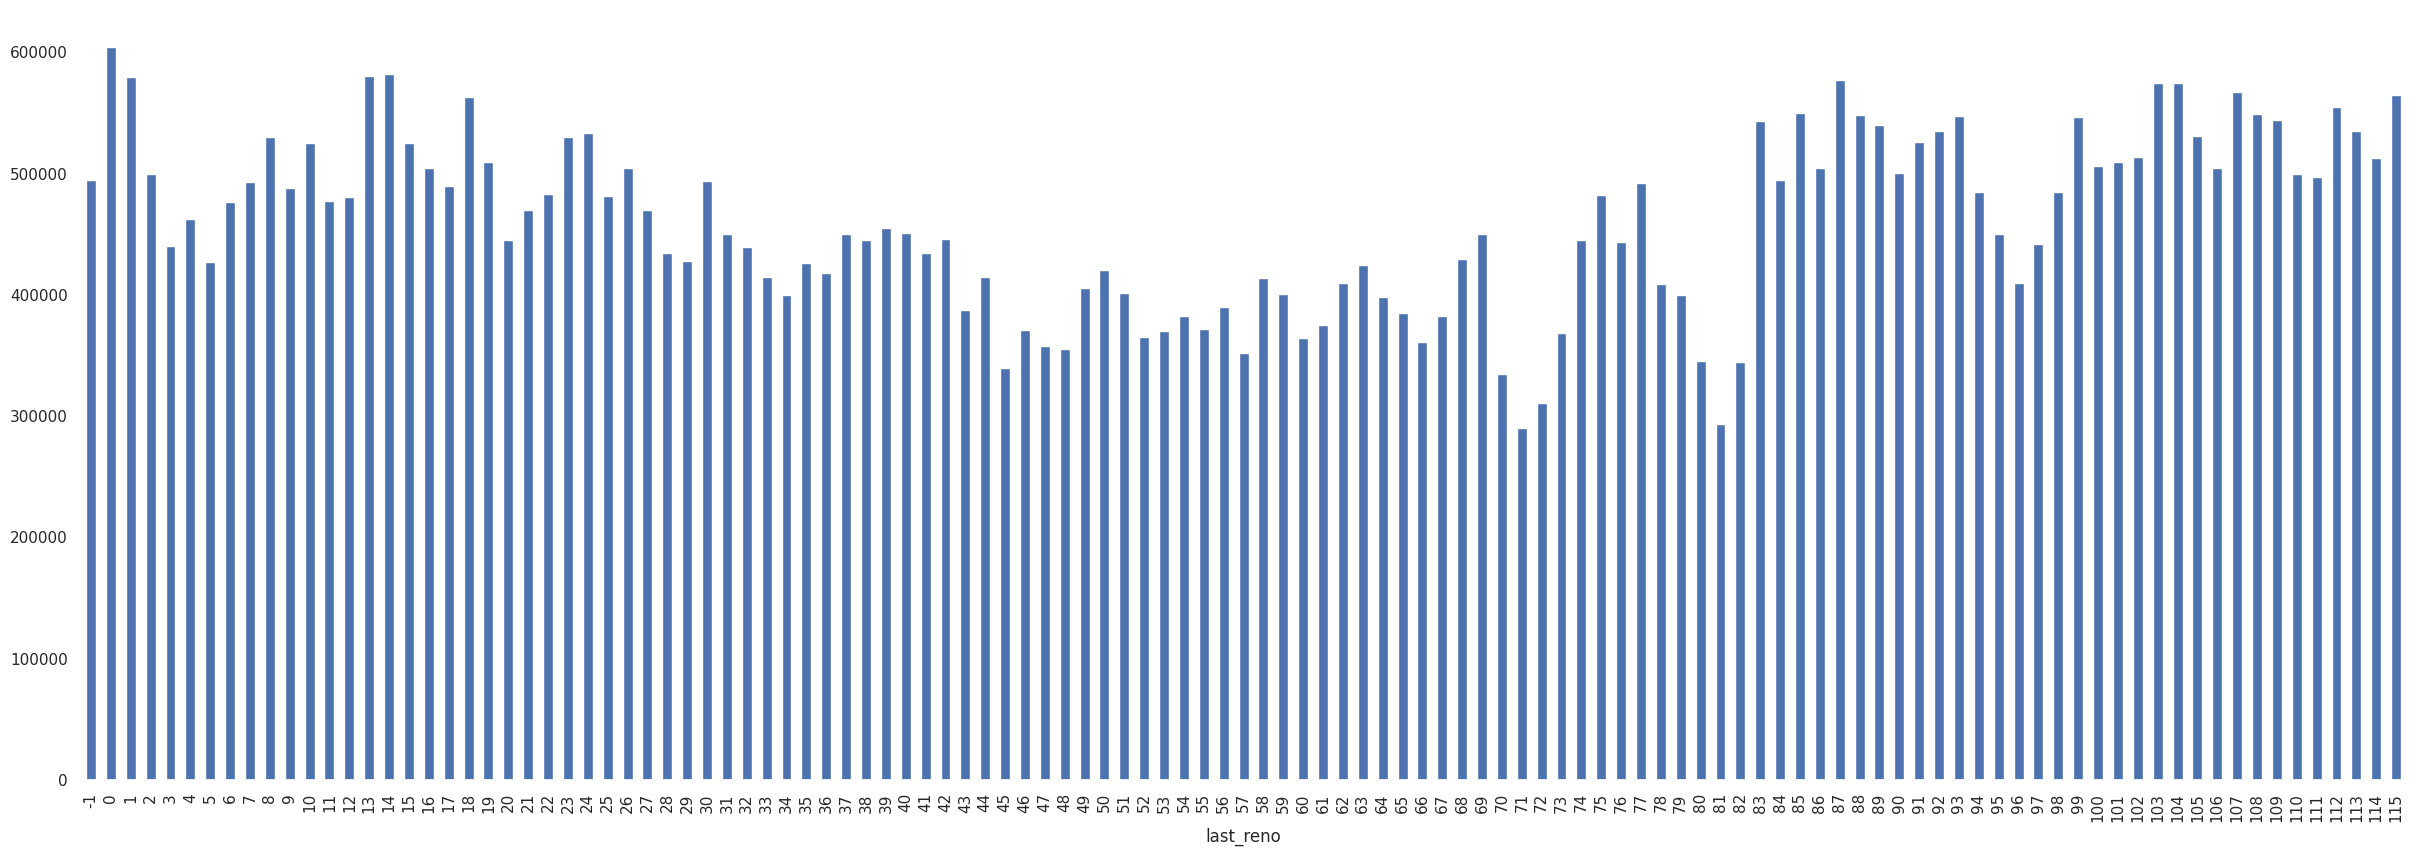

In [33]:
price_cond_med = df.groupby("last_reno")['price'].median()
price_cond_med.plot.bar(figsize=(30,10))
plt.show()

Ther should be a trend (increase or decrease) with an increase years of last_reno. House with smaller last_reno value means that it was recently renovated (which should be good and ideal). However, the scatterplot proves that there is no trend and this attribute is most likely not so useful

###Model Implementation

Feature Selection

In [34]:
# Linear Regression (with Wrapper method Forward Feature Selection)
LR = LinearRegression()

X = df.drop('price', 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sfs1 = sfs(LR, k_features=5, forward=True, floating=False, scoring='r2', verbose=2, cv=5)

sfs1 = sfs1.fit(X_train, y_train)
warnings.filterwarnings('ignore')


[2023-09-21 21:45:16] Features: 1/5 -- score: 0.49250001751677985
[2023-09-21 21:45:16] Features: 2/5 -- score: 0.5676693119341442
[2023-09-21 21:45:17] Features: 3/5 -- score: 0.6141347053398555
[2023-09-21 21:45:17] Features: 4/5 -- score: 0.6396085324497092
[2023-09-21 21:45:18] Features: 5/5 -- score: 0.6705677556130494

In [35]:
print(X.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_sold', 'age', 'last_reno'],
      dtype='object')


In [36]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 6, 8, 12, 17]


Most important cols are `sqft_living`, `view`, `grade`, `lat`, `age`
___________________________________________________________

Linear Regression (Model 1)

In [37]:
LR = LinearRegression()

X = df[['sqft_living', 'view', 'grade', 'lat', 'age']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train = X_train.astype('float64');
X_test = X_test.astype('float64');

# Scaling - Since the features are in different scale, we want to scale the features before we train the model.
std_scaler = preprocessing.MinMaxScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_train.columns)

LR.fit(X_train_std, y_train)

LinearRegression()

In [38]:
# Return the coefficient of determination R^2 of the prediction.
linear_score = LR.score(X_train_std, y_train)
linear_score

0.671910843210314

In [39]:
# Use the scaled test data to generate the prediction price
y_pred_linear = LR.predict(X_test_std_df)

# Calculate the mean-squared error
linear_mse = metrics.mean_squared_error(y_test, y_pred_linear)
linear_mse
warnings.filterwarnings('ignore')

Linear Regression (Model 2)

In [40]:
LR = LinearRegression()

X = df.drop('price', 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LR.fit(X_train, y_train)

# Return the coefficient of determination R^2 of the prediction.
linear_score = LR.score(X_train, y_train)
linear_score
warnings.filterwarnings('ignore')

In [41]:
# Use the scaled test data to generate the prediction price
y_pred_linear = LR.predict(X_test)

# Calculate the mean-squared error
linear_mse = metrics.mean_squared_error(y_test, y_pred_linear)
linear_mse

42708728531.24527

Ridge (L2 Regularization)

In [42]:
ridge_model = Ridge()

X = df.drop('price', 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
ridge_model.fit(X_train, y_train)
warnings.filterwarnings('ignore')

In [43]:
# Return the coefficient of determination R^2 of the prediction.
ridge_score = ridge_model.score(X_train, y_train)
ridge_score

0.7059482570136664

In [44]:
# Use the scaled test data to generate the prediction price
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the mean-squared error
ridge_mse = metrics.mean_squared_error(y_test, y_pred_ridge)
ridge_mse

42707027108.33392

Lasso (L1 Regularization)

In [45]:
lasso_model = Lasso()

X = df.drop('price', 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lasso_model.fit(X_train, y_train)

# Return the coefficient of determination R^2 of the prediction.
lasso_score = lasso_model.score(X_train, y_train)
lasso_score
warnings.filterwarnings('ignore')

In [46]:
# Use the scaled test data to generate the prediction price
y_pred_lasso = lasso_model.predict(X_test)

# Calculate the mean-squared error
lasso_mse = metrics.mean_squared_error(y_test, y_pred_lasso)
lasso_mse

42708734171.61231

Result

In [47]:
pd.set_option('display.float_format', '{:.6f}'.format)
pd.DataFrame([[linear_score, ridge_score, lasso_score],[linear_mse, ridge_mse, lasso_mse]],
             columns= ['Simple Linear Regression', 'Ridge Regression', 'Lasso Regression'],
             index = ['Score', 'MSE'])

,Simple Linear Regression,Ridge Regression,Lasso Regression
Score,0.705951,0.705948,0.705951
MSE,42708728531.245270,42707027108.333923,42708734171.612312


In terms of R^2 score, Ridge has the highest value while the other two share the same value. In terms of MSE score, the best one goes to Lasso. With only small difference in R^2 score between Ridge and the other two, **Lasso wins as the best model since it has the best MSE score**.

###Lasso with different attribute subsets

In [48]:
X_set1 = df.drop('price', 1)
X_set2 = df[['sqft_living', 'view', 'grade', 'lat', 'age']]
X_set3 = df.drop(['price','year_sold', 'age', 'last_reno'], axis=1)
X_set4 = df.drop(['price','condition', 'long', 'sqft_lot15', 'zipcode'], axis=1)
X_set5 = df[['bedrooms','bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'lat', 'view', 'sqft_basement', 'sqft_above', 'age', 'last_reno', 'age', 'waterfront', 'floors']]
y = df['price']
warnings.filterwarnings('ignore')

In [49]:
print(X_set4.columns)
print(X_set5.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'sqft_living15', 'year_sold', 'age', 'last_reno'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'lat',
       'view', 'sqft_basement', 'sqft_above', 'age', 'last_reno', 'age',
       'waterfront', 'floors'],
      dtype='object')


In [50]:
def modelBuild(modelCount, modelType, X_df, y_df):
  model = modelType

  X = X_df
  y = y_df

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  model.fit(X_train, y_train)

  # Return the coefficient of determination R^2 of the prediction.
  score = model.score(X_train, y_train)
  pred = model.predict(X_test)
  mse = metrics.mean_squared_error(y_test, pred)
  print(modelCount, ':', score, '(score), ', mse, '(mse)')

warnings.filterwarnings('ignore')
modelBuild('Set 1', Lasso(), X_set1, y)
modelBuild('Set 2', Lasso(), X_set2, y)
modelBuild('Set 3', Lasso(), X_set3, y)
modelBuild('Set 4', Lasso(), X_set4, y)
modelBuild('Set 5', Lasso(), X_set5, y)

Set 1 : 0.7059508705300492 (score),  42708734171.61231 (mse)
Set 2 : 0.6719108427895485 (score),  47396517568.68039 (mse)
Set 3 : 0.6827147217937737 (score),  46165540714.782776 (mse)
Set 4 : 0.6980006671480201 (score),  44060568288.384674 (mse)
Set 5 : 0.6968995740268764 (score),  44234127942.92683 (mse)


- Set 1: All attributes
- Set 2: Attributes from Feature Selection only
- Set 3: All original attributes only
- Set 4: Attributes with low correlation is dropped
- Set 5: Attributes with high correlation only (+ the new features)


Top performance in descending order: set1, set4, set5, set3, set2

This shows that the feature engineering helped a lot! Plus note that more number of attributes help